In [6]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = "Titanic"

dotenv.load_dotenv(override=True)
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

In [5]:
query = "SELECT * FROM titanic"
titanic = pd.read_sql(sql=query, con=db_engine)
titanic.head()

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912


<Axes: xlabel='Classi di bordo', ylabel='Numero di persone'>

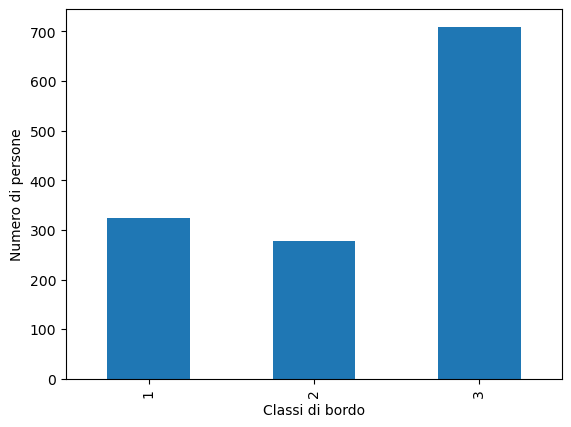

In [8]:
titanic_class = titanic.groupby("PClass")["Name"].count()
titanic_class.plot(kind="bar", xlabel="Classi di bordo", ylabel="Numero di persone")

<Axes: xlabel='PClass', ylabel='count'>

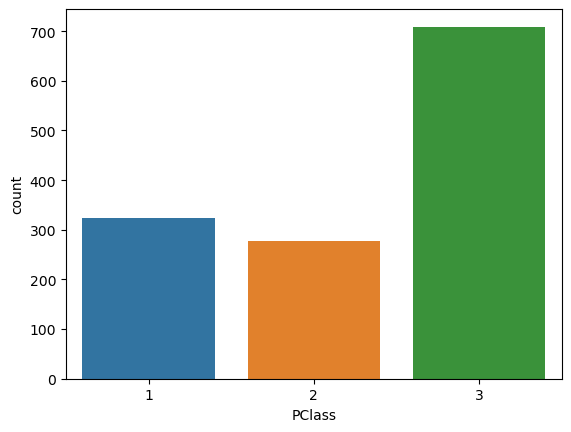

In [24]:
sns.countplot(data=titanic, x="PClass")

<Axes: xlabel='Sopravissuti', ylabel='Numero di persone'>

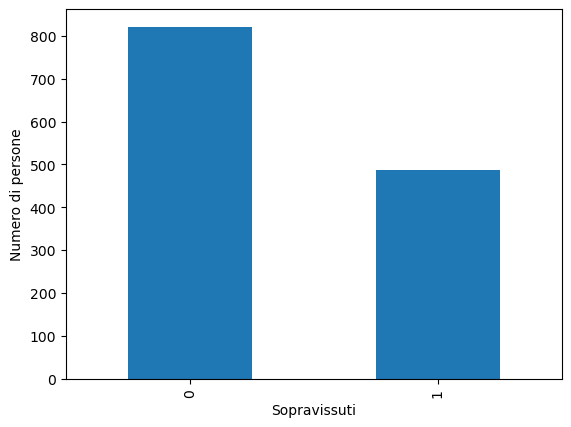

In [10]:
titanic_survived = titanic.groupby("Survived")["Name"].count()
titanic_survived.plot(kind="bar",xlabel="Sopravissuti", ylabel="Numero di persone")

<Axes: xlabel='Survived', ylabel='count'>

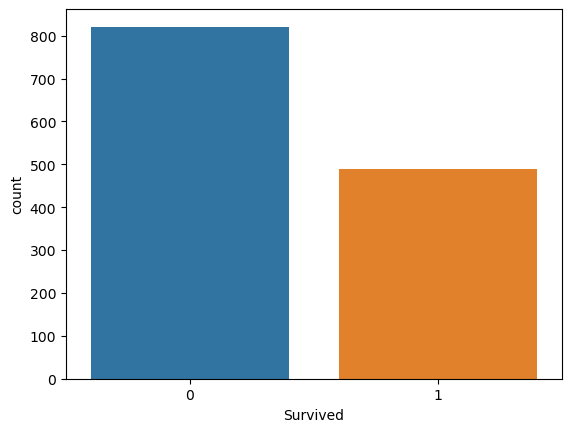

In [22]:
sns.countplot(data=titanic, x="Survived")

<Axes: ylabel='Prezzo'>

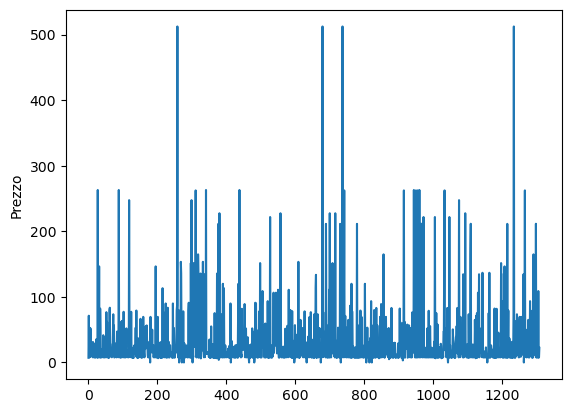

In [12]:
titanic.Fare.plot(ylabel="Prezzo")

<Axes: xlabel='Fare', ylabel='count'>

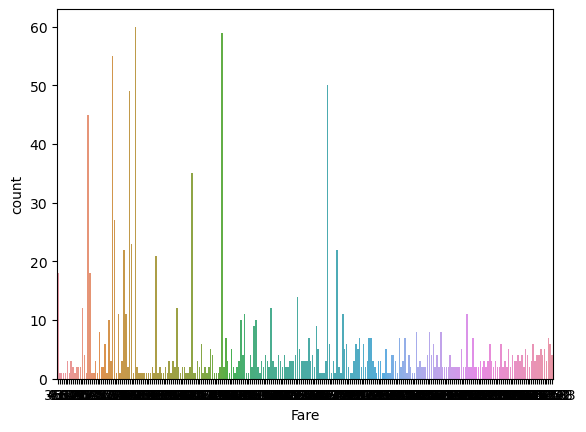

In [32]:
sns.countplot(data=titanic, x="Fare")

<Axes: xlabel='Age', ylabel='PClass'>

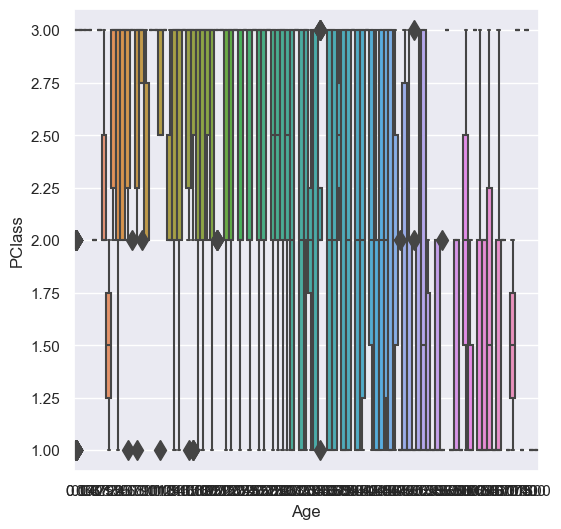

In [56]:
sns.boxplot(data=titanic,x="Age",y="PClass",width=1, fliersize=10)

<Axes: xlabel='Age', ylabel='PClass'>

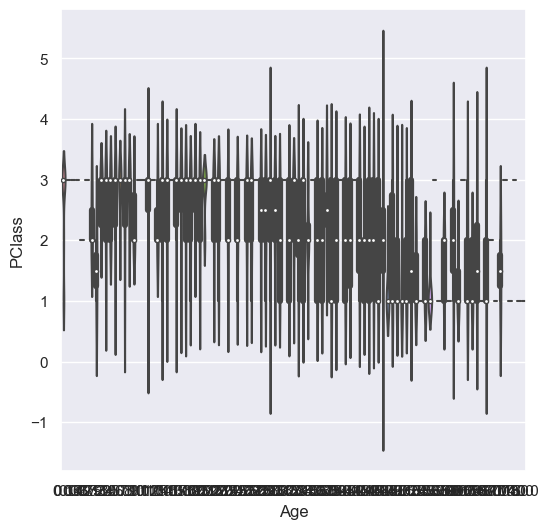

In [58]:
sns.violinplot(data=titanic,x="Age",y="PClass")

In [8]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

dotenv.load_dotenv(override=True)
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

In [10]:
file_path1 = "C:/Users/HP/Downloads/stockdata.csv"
stockdata = pd.read_csv(file_path1)
stockdata.sample(10)

,MSFT,IBM,SBUX,AAPL,GSPC,Date
338,23.839943,105.031402,7.307437,24.156378,1392.569946,2008-05-07
321,22.901363,98.823390,7.774747,19.551068,1328.319946,2008-04-14
1990,46.153144,155.243006,39.214784,116.374919,2072.830078,2014-11-26
97,24.692998,88.001400,13.235853,14.935173,1522.280029,2007-05-23
1394,26.488991,168.188869,25.104551,80.293267,1353.640015,2012-07-16
752,26.414034,115.264033,10.908469,27.995679,1127.780029,2009-12-28
218,28.015908,88.365580,10.990935,22.485449,1481.050049,2007-11-13
1680,29.159928,171.418639,34.813255,67.372625,1655.079956,2013-09-05
1827,37.724479,183.042104,34.269285,72.053198,1845.040039,2014-04-07
673,20.341346,100.890005,8.562759,22.034309,1003.239990,2009-09-03


In [12]:
stockdata = stockdata.set_index("Date")

<Axes: xlabel='Date'>

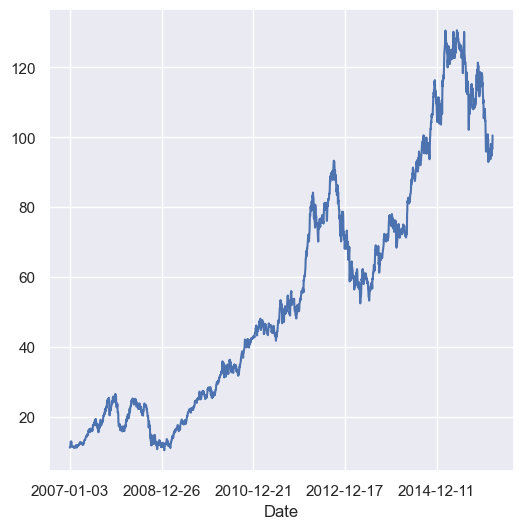

In [101]:
stockdata.AAPL.plot()

<Axes: xlabel='Date'>

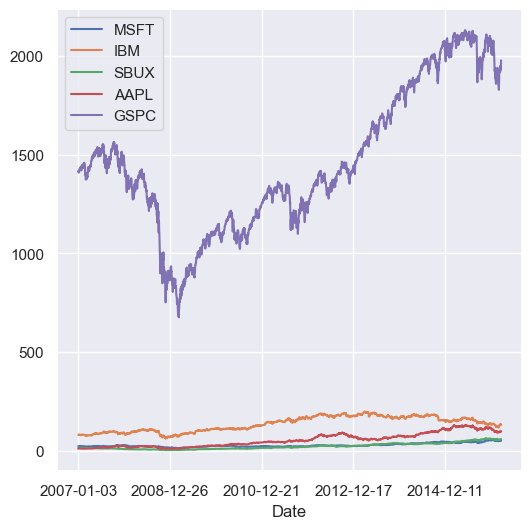

In [103]:
stockdata.plot()

<Axes: xlabel='Date'>

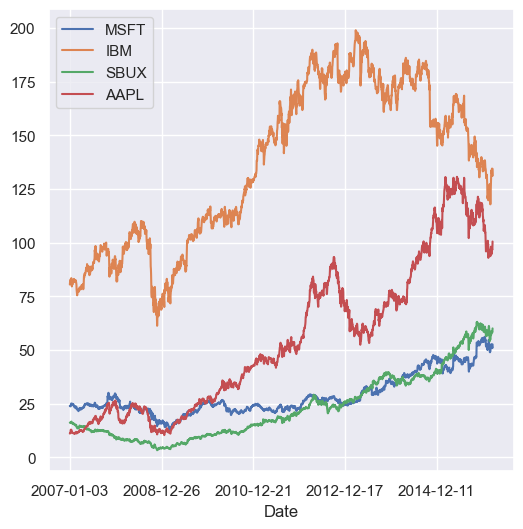

In [105]:
stockdata.loc[:,["MSFT","IBM","SBUX","AAPL"]].plot()

In [18]:
stockdata

,MSFT,IBM,SBUX,AAPL,GSPC
Date,,,,,
2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976
2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966
2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961
2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966
2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985
...,...,...,...,...,...
2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049
2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951
2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049


<Axes: xlabel='Date'>

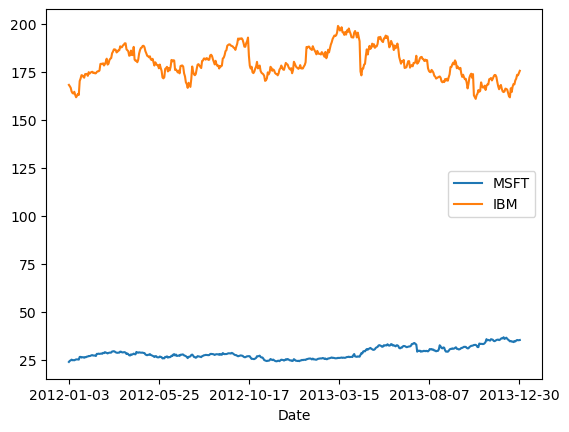

In [20]:
filtro_2012 = stockdata.index.str.contains("2012", regex=False)
filtro_2013 = stockdata.index.str.contains("2013", regex=False)
stock_1213 = stockdata.loc[filtro_2012|filtro_2013]
stock_1213.loc[:,["MSFT","IBM"]].plot()

<Axes: ylabel='Frequency'>

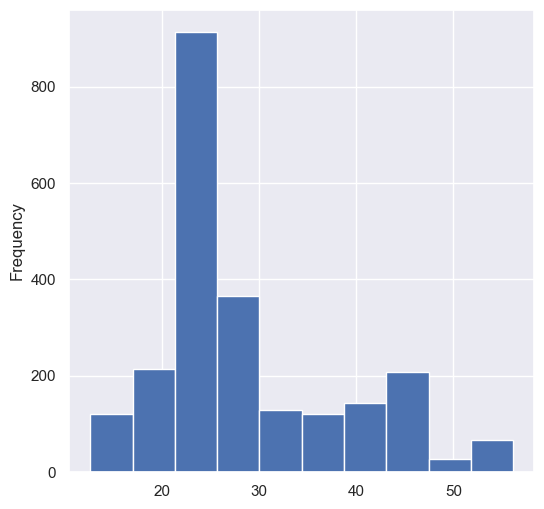

In [133]:
stockdata["MSFT"].plot(kind="hist")

In [87]:
metal = pd.read_csv("C:/Users/HP/Downloads/metal_bands_2017.csv")
metal.sample(10)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf6 in position 8431: invalid start byte

In [8]:
file_path3 = "C:/Users/HP/Downloads/election.csv"
election = pd.read_csv(file_path3)

In [10]:
election

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: >

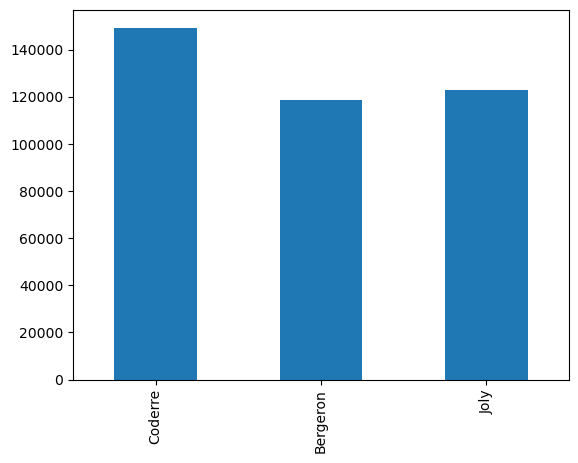

In [19]:
election.loc[:,"Coderre":"Joly"].sum().plot(kind="bar")

<Axes: xlabel='district'>

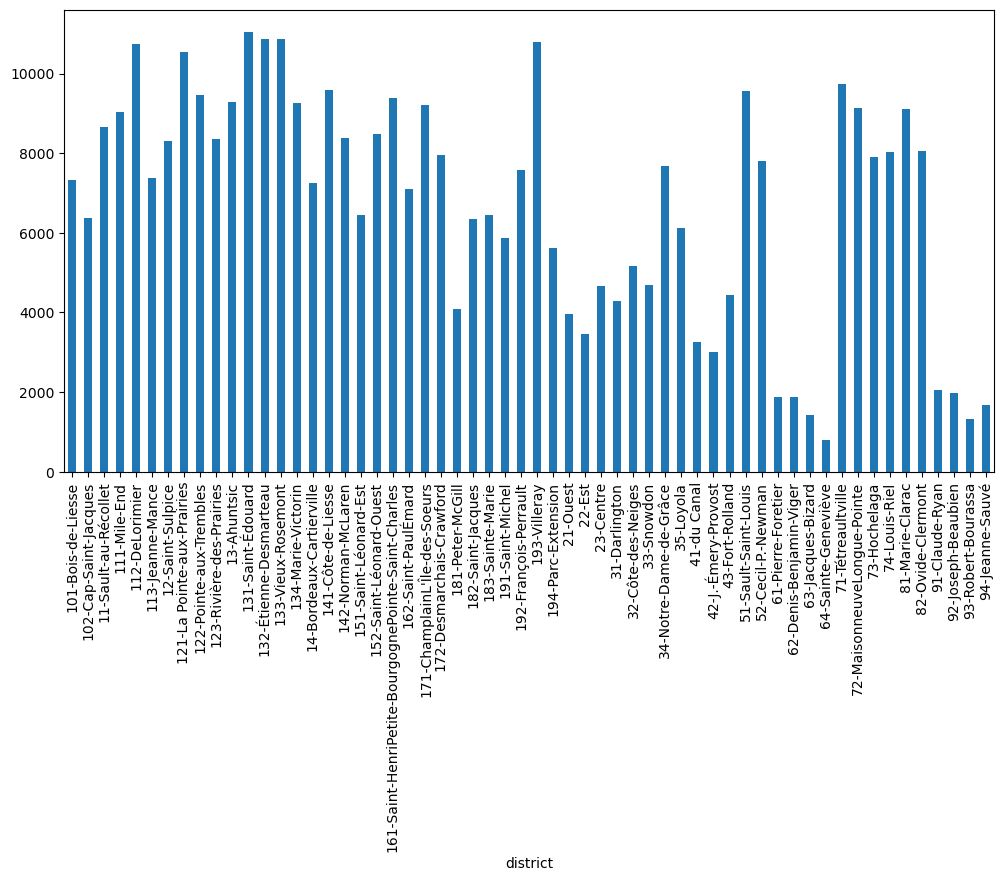

In [29]:
election.groupby("district").total.sum().plot(kind="bar",figsize=[12,6])

<Axes: xlabel='total', ylabel='district'>

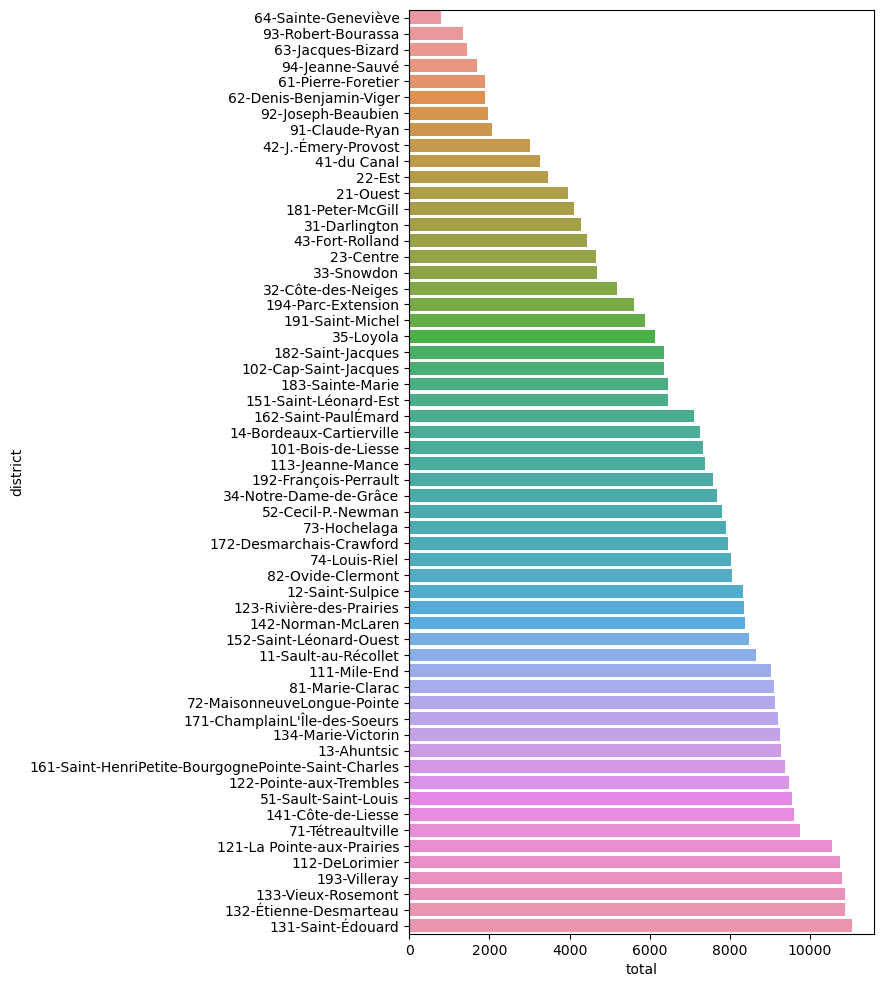

In [42]:
from matplotlib import pyplot as plt
election = election.sort_values("total")
plt.figure(figsize=[6, 12])  # cambiare dimensione del grafico
sns.barplot(data=election, y="district", x="total")

<Axes: >

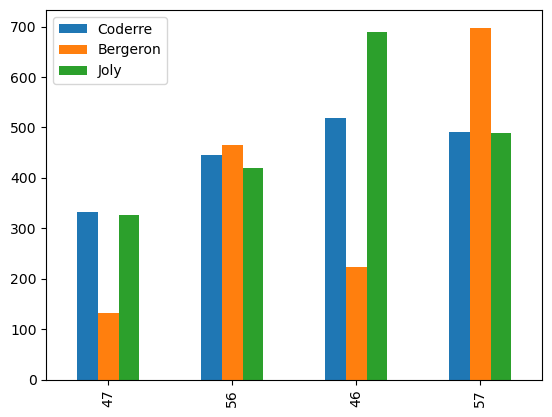

In [48]:
election_candid = election.set_index("district")
election_candid = election.loc[:,"Coderre":"Joly"]
election_candid = election_candid[:4]
election_candid.plot(kind="bar")

In [54]:
file_path4 = "C:/Users/HP/Downloads/parties/party_in_nyc.csv"
party = pd.read_csv(file_path4)

In [56]:
party.sample(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
136024,2016-08-07 18:39:27,2016-08-07 22:27:16,Residential Building/House,11420.0,SOUTH OZONE PARK,QUEENS,40.680562,-73.827067
220886,2016-12-23 22:54:44,2016-12-24 05:51:58,Residential Building/House,10462.0,BRONX,BRONX,40.832061,-73.850100
181401,2016-10-08 00:22:30,2016-10-08 02:15:00,Store/Commercial,10011.0,NEW YORK,MANHATTAN,40.741681,-74.002959
114963,2016-07-09 19:22:31,2016-07-09 22:35:12,Street/Sidewalk,10001.0,NEW YORK,MANHATTAN,40.750549,-73.987541
138984,2016-08-13 20:51:00,2016-08-13 21:49:17,Street/Sidewalk,10032.0,NEW YORK,MANHATTAN,40.841154,-73.936265
44038,2016-04-14 20:39:47,2016-04-14 21:51:55,Residential Building/House,10451.0,BRONX,BRONX,40.823104,-73.924572
81507,2016-06-03 09:39:16,2016-06-03 14:08:28,Residential Building/House,11368.0,CORONA,QUEENS,40.741943,-73.854229
189507,2016-10-21 21:51:11,2016-10-22 00:18:42,Club/Bar/Restaurant,11414.0,HOWARD BEACH,QUEENS,40.649982,-73.837586
148885,2016-08-28 00:32:53,2016-08-28 02:10:37,Residential Building/House,11208.0,BROOKLYN,BROOKLYN,40.686282,-73.880272
178868,2016-10-02 19:26:43,2016-10-02 20:17:11,Street/Sidewalk,11216.0,BROOKLYN,BROOKLYN,40.680964,-73.954842


In [64]:
party.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


<Axes: xlabel='City'>

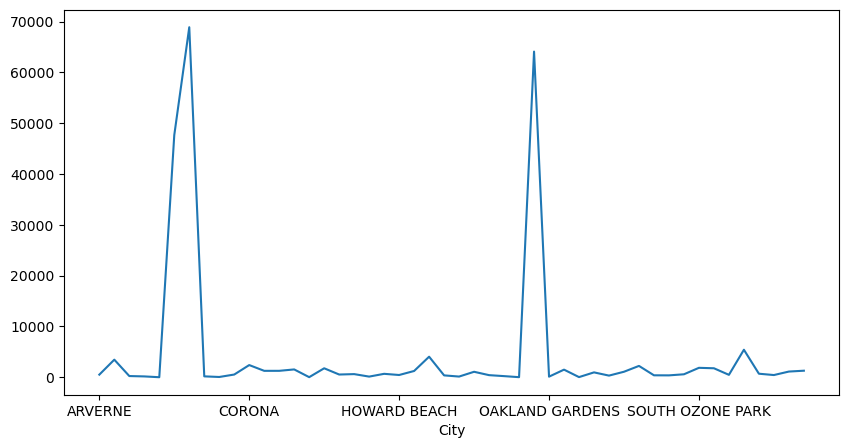

In [74]:
party.groupby("City").City.count().plot(figsize=[10,5])

In [77]:
party["Location Type"].value_counts()

Location Type
Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: count, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

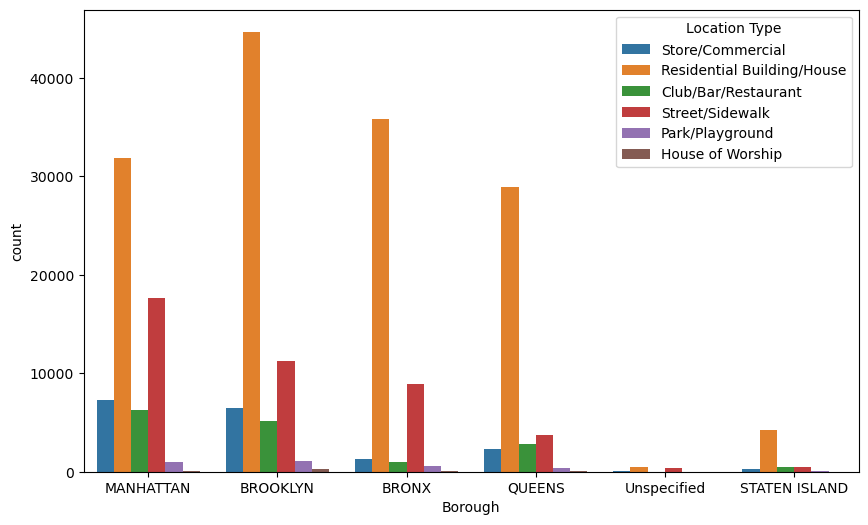

In [92]:
plt.figure(figsize=[10, 6])
sns.countplot(data=party, x="Borough", hue="Location Type")
#hue splitta i dati in diverse informazioni, splittandoli in un'ulteriore colonna.